# Задание по программированию: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Задание 1. Минимизация гладкой функции

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) на промежутке [1, 30]

In [69]:
import scipy.optimize
from numpy import sin, exp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

In [70]:
function = lambda x: sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)

In [71]:
x0 = [1.0]
print(scipy.optimize.minimize(function, x0))

      fun: 1.7452682903319983
 hess_inv: array([[ 6.02518615]])
      jac: array([ -1.04308128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 4.13628814])


In [72]:
x1 = [1.1]
print(scipy.optimize.minimize(function, x1))

      fun: 1.7452682903319783
 hess_inv: array([[ 6.02690105]])
      jac: array([ -7.45058060e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 4.13628844])


In [73]:
x2 = [1.2]
print(scipy.optimize.minimize(function, x2))

      fun: 1.7452682903319805
 hess_inv: array([[ 6.02803228]])
      jac: array([ -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 4.13628838])


In [74]:
x3 = 2.0
res1 = scipy.optimize.minimize(function, x3, method='BFGS')
#print(res1)
print(res1.x)
print(np.round(res1.x, 2))

[ 4.13627619]
[ 4.14]


In [75]:
x4 = [30.0]
res2 = scipy.optimize.minimize(function, x4, method='BFGS')
#print(res2)
print(res2.x)
print(np.round(res2.x, 2))

[ 25.88019358]
[ 25.88]


In [76]:
print(function(res1.x))
print(function(res2.x))

[ 1.74526829]
[-11.89889467]


In [77]:
answer1 = np.round(function(res1.x),2)
answer2 = np.round(function(res2.x),2)
print(np.round(function(res1.x),2))
print(np.round(function(res2.x),2))

[ 1.75]
[-11.9]


In [78]:
with open('submission-1.txt', 'w') as file:
    file.write('%.2f %.2f' % (answer1, answer2))

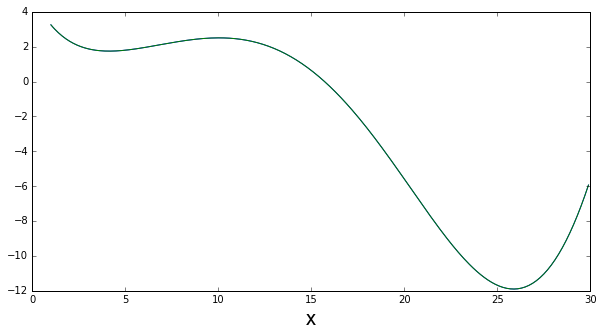

In [80]:
x = np.arange(1, 30, 0.1)
y = function(x)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, function(x), label = u'Функция')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 20})

plt.plot(x, y)
plt.show()

### Задание 2. Глобальная оптимизация

In [81]:
res3 = scipy.optimize.differential_evolution(function, [(1, 30)])

In [82]:
print(res3)

     fun: array([-11.89889467])
     jac: array([  5.32907052e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([ 25.88019393])


In [83]:
answer3 = np.round(function(res3.x)) #округляет до -12. Для загрузки в качестве ответа нужно указывать -11.9
print(function(res3.x))

[-11.89889467]


In [84]:
with open('submission-2.txt', 'w') as file:
    file.write('%.2f' % (answer3))

### Задача 3. Минимизация негладкой функции

In [85]:
def fun(x):
    return sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)
def funh(x):
    return int(fun(x))

In [86]:
x4 = 30.0
res4 = scipy.optimize.minimize(funh, x4, method='BFGS')
print(res4.x)
print(np.round(res4.x, 2))
print(np.round(funh(res4.x),2))
min4 = np.round(res4.x, 2)
answer4 = np.round(funh(res4.x),2)

[ 30.]
[ 30.]
-5


In [87]:
res5 = scipy.optimize.differential_evolution(funh, [(1, 30)])
print(res5)
print(np.round(res5.x, 2))
print(np.round(funh(res5.x),2))
min5 = np.round(res5.x, 2)
answer5 = np.round(funh(res5.x),2)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 24.82547692])
[ 24.83]
-11


In [88]:
with open('submission-3.txt', 'w') as file:
    file.write('%.2f %.2f' % (answer4, answer5))